In [1]:
import numpy as np 
import pandas as pd

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam, RMSprop

from collections import deque
import gym
import matplotlib.pyplot as plt

from agent import NNAgent, DQLAgent
from data.get_data import *

%load_ext autoreload
%autoreload 2

In [6]:
episodes = 500

env = gym.make("CartPole-v1", render_mode="human")

agent = DQLAgent(env, finish=True)
agent.learn(episodes)

env.close()

1/1 [==============================] - 0s 33ms/step


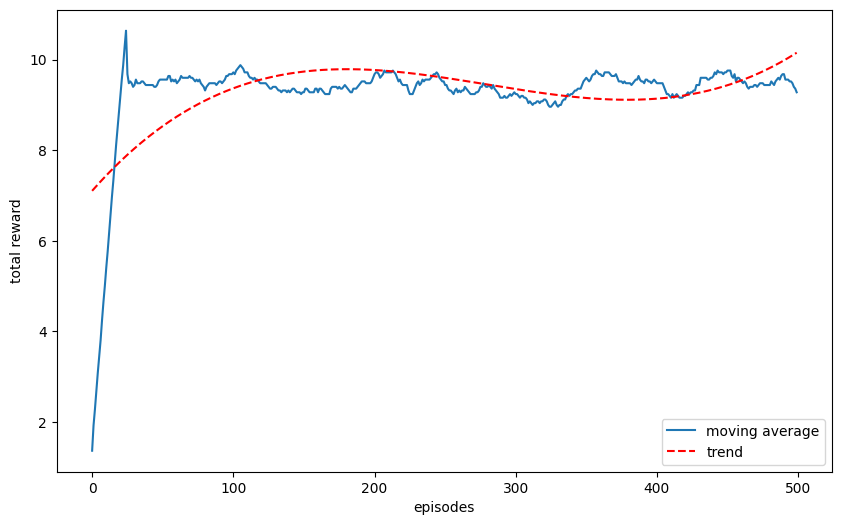

In [7]:
plt.figure(figsize = (10, 6))
x = range(len(agent.averages))
y = np.polyval(np.polyfit(x, agent.averages, deg=3), x)

plt.plot(agent.averages, label="moving average")
plt.plot(x, y, 'r--', label='trend')
plt.xlabel('episodes')
plt.ylabel('total reward')
plt.legend()


In [10]:
agent.model.save("C:/Users/cc/Desktop/R_Learning/")

INFO:tensorflow:Assets written to: C:/Users/cc/Desktop/R_Learning/assets


INFO:tensorflow:Assets written to: C:/Users/cc/Desktop/R_Learning/assets


In [ ]:
class observation_space:
    
    def __init__(self, n):
        self.shape = (n,)
        

class action_space:
    
    def __init__(self, n):
        self.n = n
    
    def seed(self, seed):
        pass
    
    def sample(self):
        return random.randint(0, self.n-1)
    
    

In [ ]:
class Finance:
    
    def __init__(self, symbol, features = "close"):
        self.symbol = symbol
        self.features = features
        self.interval = "1d"
        self.observation_space = observation_space(4)
        self.osn = self.observation_space.shape[0]
        self.action_space = action_space(2)
        self.min_accuracy = 0.475
        self._get_data()
        self._prepare_data()
        
        
    def _get_data(self):
        self.raw = Get_data(self.symbol, self.interval)
        
        
    def _prepare_data(self):
        self.data = pd.DataFrame(self.raw.close)
        self.data['r'] = np.log(self.data / self.data.shift(1))
        self.data.dropna(inplace = True)
        self.data = (self.data - self.data.mean()) / self.data.std()
        self.data['d'] = np.where(self.data['r'] > 0, 1, 0)
    
    
    def _get_state(self):
        return self.data[self.features].iloc[self.bar - self.osn : self.bar].values
    
    
    def seed(self, seed = None):
        pass
    
    def reset(self):
        self.treward = 0
        self.accurcy = 0
        self.bar = self.osn 
        state = self.data[self.features].iloc[self.bar - self.osn : self.bar]
        return state.values
    
    def step(self, action):
        correct = action == self.data['d'].iloc[self.bar]
        reward = 1 if correct else 0
        self.treward += reward
        self.bar += 1
        self.accurcy = self.treward / (self.bar - self.osn)
        if self.bar >= len(self.data):
            done = True
        elif reward == 1:
            done = False
        elif (self.accurcy < self.min_accuracy and self.bar > self.osn+10):
            done = True
        else:
            done = False
        
        state = self._get_data()
        info = {}
        return state, reward, done, info

        

In [ ]:
fin = Finance("BTC")
fin.reset()

In [ ]:
x = 1
y = 2
x = y == 1

y